#Generating Rhizobia Phase I Files and Figures#
##Generating split barplot of differentially expressed gens##

In [9]:
#Import the library containing the functions we will be using
#Make sure this file is in your current directory
import BioinformaticsLibrary as BL #This can be found in the Python Scripts directory. Make sure the BioinformaticsLibrary.py script is in your working directory
import matplotlib.pyplot as plt
import pandas as pd

#Obtain Rhizobia DEG counts
amp07 = BL.count_DEGs(DEG_file='rhizobia_compiled_dge_tpm_ortho.xlsx',
                      sheet_name='amp07', 
                      LFC_suffix='_log2FC', padj_suffix='_padj', 
                      L2FC_threshold=1, adjP_threshold=0.05)

amp08 = BL.count_DEGs(DEG_file='rhizobia_compiled_dge_tpm_ortho.xlsx',
                      sheet_name='amp08', 
                      LFC_suffix='_log2FC', padj_suffix='_padj', 
                      L2FC_threshold=1, adjP_threshold=0.05)

smp01 = BL.count_DEGs(DEG_file='rhizobia_compiled_dge_tpm_ortho.xlsx',
                      sheet_name='smp01', 
                      LFC_suffix='_log2FC', padj_suffix='_padj', 
                      L2FC_threshold=1, adjP_threshold=0.05)

vmo01 = BL.count_DEGs(DEG_file='rhizobia_compiled_dge_tpm_ortho.xlsx',
                      sheet_name='vmo01', 
                      LFC_suffix='_log2FC', padj_suffix='_padj', 
                      L2FC_threshold=1, adjP_threshold=0.05)

vtc07 = BL.count_DEGs(DEG_file='rhizobia_compiled_dge_tpm_ortho.xlsx',
                      sheet_name='vtc07', 
                      LFC_suffix='_log2FC', padj_suffix='_padj', 
                      L2FC_threshold=1, adjP_threshold=0.05)

#Concatenate all dataframes into a single dataframe
full_rhizo = pd.concat([amp07, amp08, smp01, vmo01, vtc07], axis=0)

#Show concatenated table
print(full_rhizo)

#Expoort concatenated table
full_rhizo.to_csv('Compiled_Rhizo_DEGs.csv', index=False)


              Comparison   Up Down
0  AMp07_491873_HgvsCont  318  258
1  AMp07_491873_CdvsCont  183  120
0  AMp08_491781_HgvsCont    9    3
0  SMp01_491863_HgvsCont   16    3
1  SMp01_491863_CdvsCont  704  802
0  VMo01_491855_HgvsCont  330  512
1  VMo01_491855_CdvsCont  485  680
0     Vtc07_436_HgvsCont    0    0
1     Vtc07_436_CdvsCont   22    0


- Notice that comparsion names have extra information and are difficult to interpret
- We will manually change the names in the exported .csv file as this is easier than changing them in python

In [10]:
#Import the compiled DEG file with updated comparison names
new_full = pd.read_csv('Compiled_Rhizo_DEGs_newNames.csv')

- We would like to sort the barplot by total DEGs
- In order to do this we will sum the up and downregulated genes

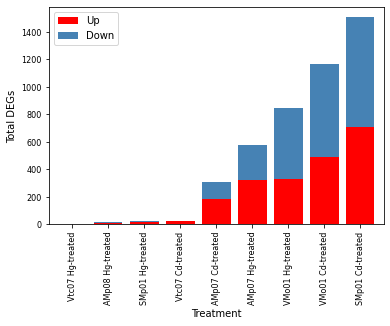

In [13]:
#Create a total column that is the sum of up and down regulated genes
new_full['Total'] = new_full['Up'] + new_full['Down']

#sort by increasing total DEGs
new_full = new_full.sort_values(['Total'])

#Drop total column so it isn't used in the barplot
new_full = new_full.drop(columns=['Total'])

#Plot DEGs
fig = new_full.set_index('Comparison').plot(kind='bar', stacked=True, color=['red', 'steelblue'], width=0.8)
plt.xlabel('Treatment')
plt.ylabel('Total DEGs')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.savefig('Rhizobia_stacked_split_DEG_by_total.pdf', bbox_inches='tight')
